In [1]:
#import and setup
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import numpy as np

finn_key = 'sandbox_cc7v412ad3i03fardc9g'

#import finnhub
import finnhub
finnhub_client = finnhub.Client(api_key=finn_key)

#finnhub utcdate codes for slicing by year for each stock
#2019 times
beg_2019 = 1546300800
end_2019 = 1577836799
#2020 times
beg_2020 = 1577836800
end_2020 = 1609459199
#2021 times
beg_2021 = 1609459200
end_2021 = 1640995199


In [2]:
#def function to create a dataframe for each stock
def stock_df(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'W', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [3]:
#def function to create a stock chart for the price/date and volume
def plot_chart(dataframe, stock_name, year):
    fig= plt.figure(figsize=(20,15))
    top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
    top_plt.plot(dataframe.index, dataframe['Close'])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Performance Over the Year {year}')
    bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
    bottom_plt.bar(dataframe.index, dataframe['Volume'])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    fig.tight_layout();

In [59]:
microsoft2020 = stock_df('MSFT', beg_2020, end_2020)
stock_date2020 = microsoft2020.set_index('Time')
stock_date2020

,Close,High,Low,Open,Volume
Time,,,,,
2019-12-26,122.815500,123.492000,122.631000,123.000000,34
2020-01-02,123.036334,123.245016,122.385738,122.754000,18
2020-01-09,123.589998,123.799619,122.936474,123.306393,39
2020-01-16,123.675480,124.356717,123.489688,123.861272,85
2020-01-23,123.897860,124.108003,123.242709,123.613549,97
2020-01-30,124.455401,124.666489,123.797301,124.169810,37
2020-02-06,124.541481,125.227489,124.354389,124.728574,85
2020-02-13,124.765419,124.977034,124.105680,124.479117,32
2020-02-20,124.851714,125.539430,124.664155,125.039273,41


In [5]:
microsoft2021 = stock_df('MSFT', beg_2021, end_2021)
stock_date2021 = microsoft2021.set_index('Time')
stock_date2021.head()

,Close,High,Low,Open,Volume
Time,,,,,
2020-12-31,123.282900,123.492000,122.631000,123.000000,1
2021-01-07,123.368170,124.047714,123.182840,123.553500,79
2021-01-14,123.589998,123.799619,122.936474,123.306393,66
2021-01-21,124.146153,124.356717,123.489688,123.861272,56
2021-01-28,124.232020,124.916322,124.045392,124.418647,5


In [11]:
microsoft2019 = stock_df('MSFT', beg_2019, end_2019)
stock_date2019 = microsoft2019.set_index('Time')
stock_date2019

,Close,High,Low,Open,Volume
Time,,,,,
2018-12-27,122.815500,123.492000,122.631000,123.000000,16
2019-01-03,123.036334,123.245016,122.385738,122.754000,31
2019-01-10,123.121433,123.799619,122.936474,123.306393,26
2019-01-17,122.875191,123.552019,122.690601,123.059780,93
2019-01-24,122.629440,123.304915,122.445220,122.813661,80
2019-01-31,122.849940,123.058305,122.200329,122.568033,80
2019-02-07,122.934910,123.612068,122.750231,123.119589,74
2019-02-14,122.689040,123.364844,122.504730,122.873350,19
2019-02-21,122.443662,123.118114,122.259721,122.627604,8


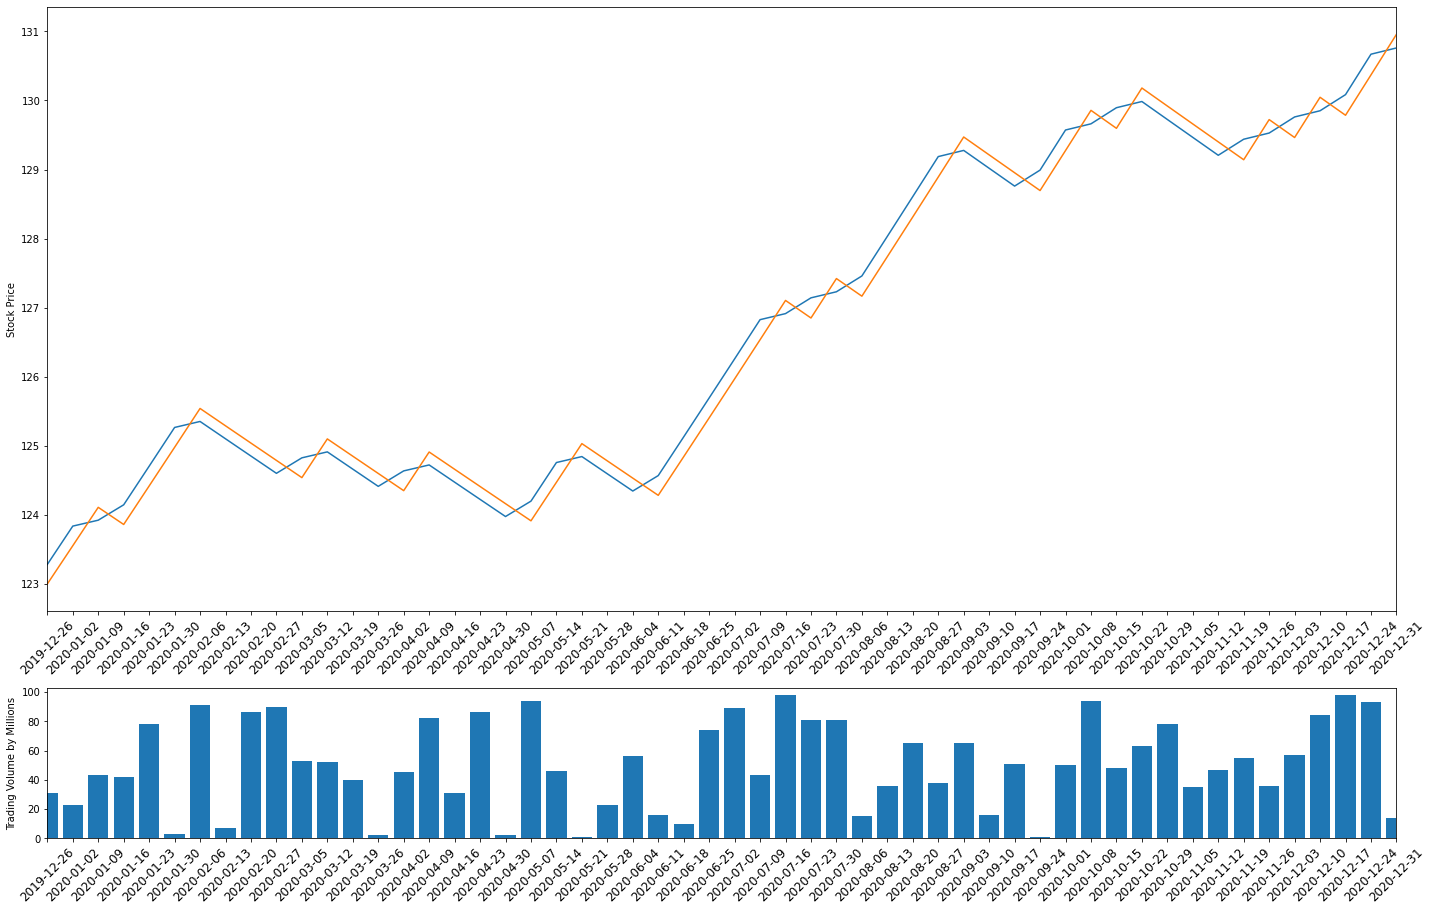

In [17]:
fig= plt.figure(figsize=(20,15))
top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
top_plt.plot(stock_date2020.index, stock_date2020['Close'], stock_date2020['Open'])
plt.xticks(rotation=45, fontsize=12)
plt.xlim([min(stock_date2020.index),max(stock_date2020.index)])
plt.ylabel('Stock Price')
bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_date2020.index, stock_date2020['Volume'])
plt.xticks(rotation=45, fontsize=12)
plt.xlim([min(stock_date2020.index),max(stock_date2020.index)])
plt.ylabel('Trading Volume by Millions')
fig.tight_layout();

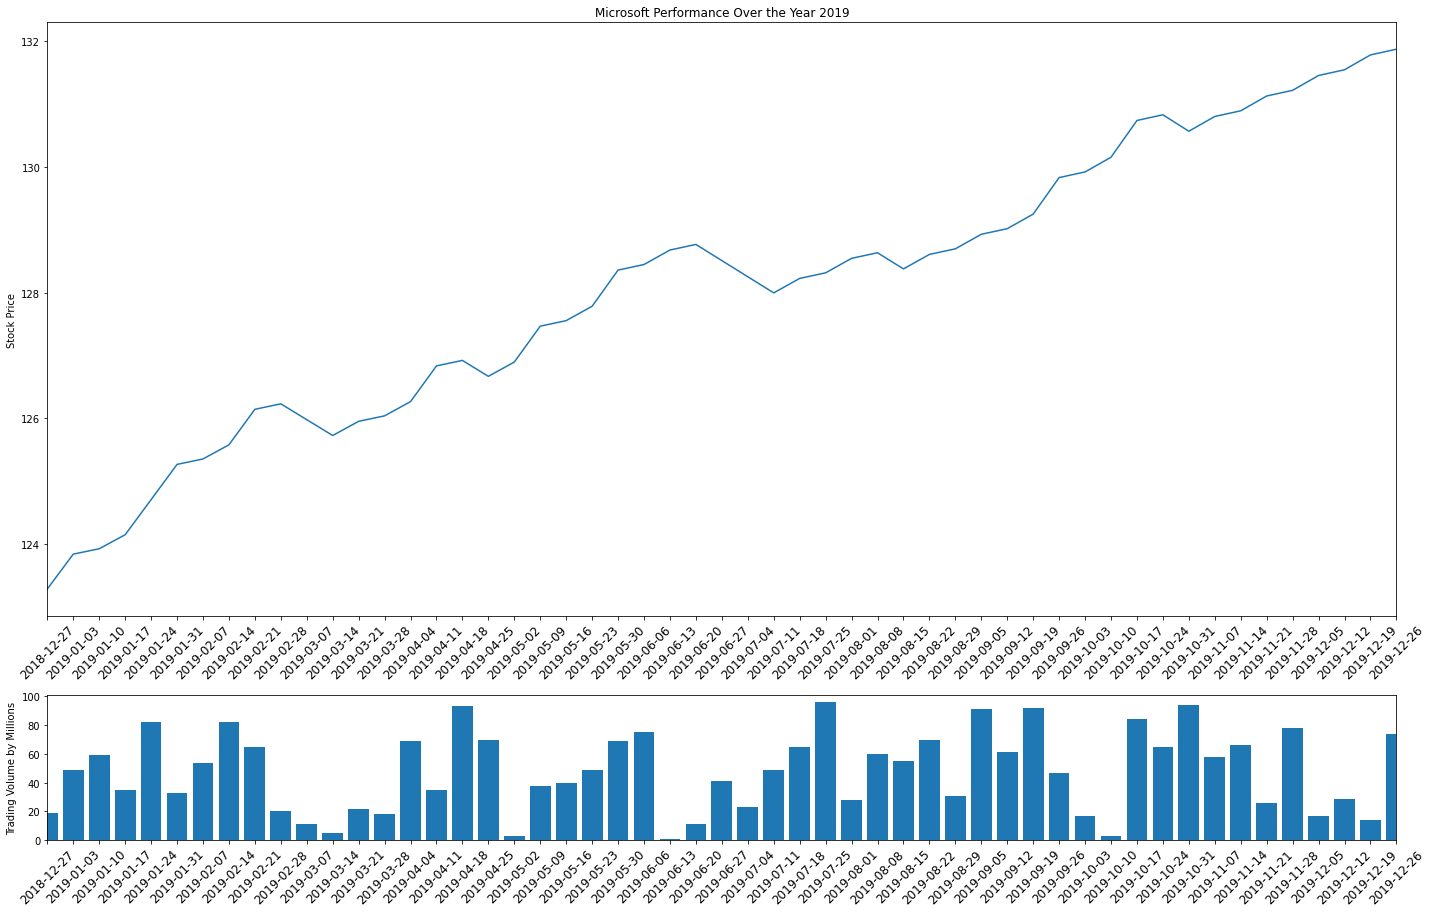

In [8]:
plot_chart(stock_date2019,'Microsoft',2019)

In [24]:
#created a seperate stock df by day function for our covid data
def stock_df_day(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'D', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name